# Using pre-trained CNN

In this lab, we will see:

- Zero-shot performance of pre-trained backbone
- Use pre-trained CNN as backbone
- Fine-tuning the pre-trained CNN

In [4]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

In [5]:
batch_size = 64
lr = 0.01
epochs = 15
device = torch.device("cuda") # to use the GPU

In [6]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

# Adjust your transform_train to include resizing
transform_train = transforms.Compose([
    transforms.Resize(224),  # Resize to 224x224
    transforms.RandomCrop(224, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Adjust your transform_test to include resizing
transform_test = transforms.Compose([
    transforms.Resize(224),  # Resize to 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load the CIFAR-10 dataset with the new transformations
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainset, valset = torch.utils.data.random_split(train_dataset, [40000, 10000])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=False)

testset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


c:\Users\sangi\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sangi\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15
Train Loss: 0.5961, Test Loss: 0.3075, Accuracy: 89.24%, Time: 99.69s
Epoch 2/15
Train Loss: 0.2409, Test Loss: 0.2480, Accuracy: 91.44%, Time: 99.00s
Epoch 3/15
Train Loss: 0.1569, Test Loss: 0.2079, Accuracy: 92.84%, Time: 99.08s
Epoch 4/15
Train Loss: 0.1074, Test Loss: 0.2065, Accuracy: 93.07%, Time: 100.35s
Epoch 5/15
Train Loss: 0.0705, Test Loss: 0.1998, Accuracy: 93.78%, Time: 103.20s
Epoch 6/15
Train Loss: 0.0464, Test Loss: 0.1898, Accuracy: 94.29%, Time: 100.81s
Epoch 7/15
Train Loss: 0.0297, Test Loss: 0.1775, Accuracy: 94.44%, Time: 100.70s
Epoch 8/15
Train Loss: 0.0217, Test Loss: 0.1639, Accuracy: 95.29%, Time: 101.04s
Epoch 9/15
Train Loss: 0.0124, Test Loss: 0.1452, Accuracy: 95.62%, Time: 101.97s
Epoch 10/15
Train Loss: 0.0076, Test Loss: 0.1455, Accuracy: 96.07%, Time: 101.57s
Epoch 11/15
Train Loss: 0.0047, Test Loss: 0.1429, Accuracy: 95.92%, Time: 99.37s
Epoch 12/15
Train Loss: 0.0036, Test Loss: 0.1406, Accuracy: 96.02%, Time: 100.17s
Epoch 13/15
Train

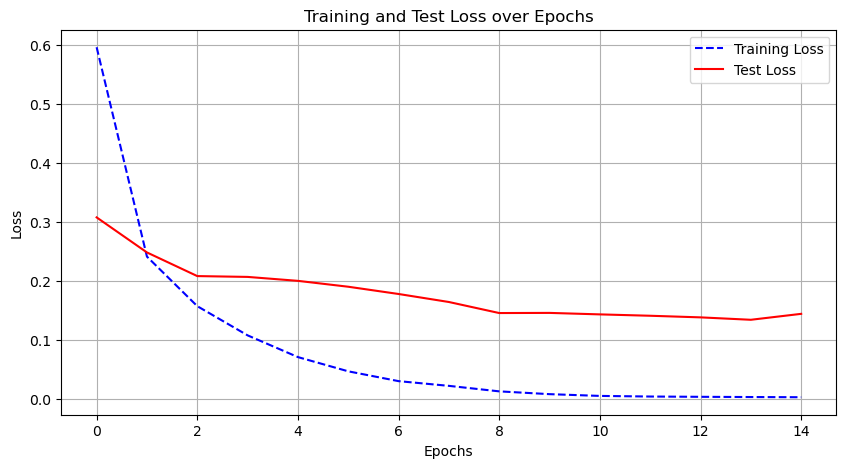

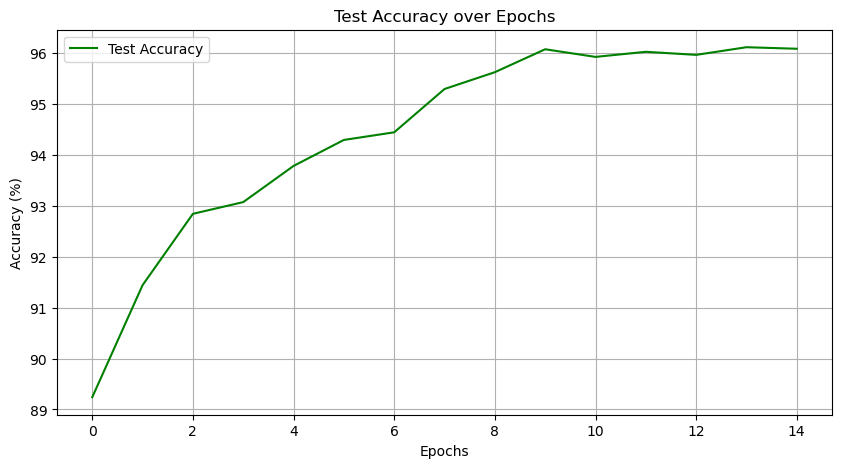

Plots saved as 'plot_assignment2\Resnet18 Pretrained_loss.png' and 'plot_assignment2\Resnet18 Pretrained_accuracy.png'.

Training Complete!
Total Training Time: 1506.13 seconds
Minimum Training Loss: 0.0024
Minimum Test Loss: 0.1338
Highest Test Accuracy: 96.11%
Accuracy for class: plane is 97.4 %
Accuracy for class: car   is 96.9 %
Accuracy for class: bird  is 94.6 %
Accuracy for class: cat   is 87.3 %
Accuracy for class: deer  is 97.9 %
Accuracy for class: dog   is 93.9 %
Accuracy for class: frog  is 97.8 %
Accuracy for class: horse is 97.1 %
Accuracy for class: ship  is 97.7 %
Accuracy for class: truck is 97.8 %


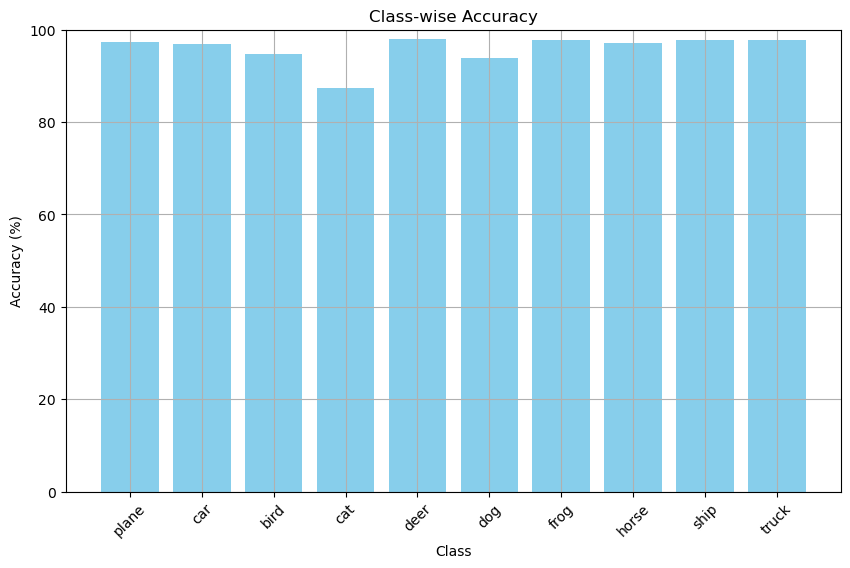

TypeError: plot_class_accuracy_with_confusion_matrix() missing 1 required positional argument: 'device'

In [ ]:
net = models.resnet18(pretrained=True)

for param in net.parameters():
    param.requires_grad = True
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
criterion = nn.CrossEntropyLoss()
net = net.to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
plot_training(net, trainloader=trainloader, testloader=valloader, epochs=epochs, optimizer=optimizer, criterion=criterion, scheduler=scheduler, title='Resnet18 Pretrained')
plot_class_accuracy(net, testloader, classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

# Zero-Shot Resnet18

## Load a pre-defined network with pretrained weights



In [2]:
# count the trainable parameters of the model
def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train(net, trainloader, optimizer, criterion, device):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(trainloader)
    return avg_train_loss


def test(net, testloader, criterion, device):
    net.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            # Calculate loss
            outputs = net(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate average test loss
    avg_test_loss = test_loss / len(testloader)
    accuracy = 100 * correct / total
    #print(f'Accuracy of the network on the test images: {accuracy:.2f}%')
    #print(f'Average Test Loss: {avg_test_loss:.4f}')
    return avg_test_loss, accuracy


import matplotlib.pyplot as plt
import torch

def class_accuracy(net, testloader, classes):
    accuracies = []
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # No gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)

            # Collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label.item() == prediction.item():  # Convert to Python integers for comparison
                    correct_pred[classes[label.item()]] += 1
                total_pred[classes[label.item()]] += 1

    # Print accuracy for each class
    for classname, correct_count in correct_pred.items():
        total_count = total_pred[classname]
        if total_count > 0:  # Avoid division by zero
            accuracy = 100 * float(correct_count) / total_count
        else:
            accuracy = 0.0  # No samples in this class
        accuracies.append(accuracy)
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    return accuracies  # Return the accuracies list

def plot_class_accuracy(net, testloader, classes):
    accuracies = class_accuracy(net, testloader, classes)  # Pass classes argument
    plt.figure(figsize=(10, 6))
    plt.bar(classes, accuracies, color='skyblue')
    plt.xlabel('Class')
    plt.grid()
    plt.ylabel('Accuracy (%)')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 to represent percentage
    plt.xticks(rotation=45)
    plt.show()


import os
import time
import matplotlib.pyplot as plt

device = 'cuda'

def plot_training(net, trainloader, testloader, epochs, optimizer, criterion, scheduler, title):
    running_train_loss = []
    running_test_loss = []
    running_accuracy = []
    execution_time = 0

    # Loop through each epoch
    for e in range(epochs):
        start = time.time()

        # Print current epoch number
        print(f"Epoch {e + 1}/{epochs}")

        # Training and testing for the current epoch
        train_loss = train(net=net, trainloader=trainloader, optimizer=optimizer, criterion=criterion, device=device)
        test_loss, accuracy = test(net=net, testloader=testloader, criterion=criterion, device=device)

        # Update lists for plotting
        running_train_loss.append(train_loss)
        running_test_loss.append(test_loss)
        running_accuracy.append(accuracy)

        # Step the scheduler at the end of each epoch
        if scheduler is not None:
            scheduler.step()

        end = time.time()
        epoch_time = end - start
        execution_time += epoch_time

        # Print metrics for the current epoch
        print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%, Time: {epoch_time:.2f}s")

    # Create directory if it doesn't exist
    save_dir = 'plot_assignment2'
    os.makedirs(save_dir, exist_ok=True)

    # Plot Training and Test Loss
    plt.figure(figsize=(10, 5))
    plt.plot(running_train_loss, label='Training Loss', color='blue', linestyle='--')
    plt.plot(running_test_loss, label='Test Loss', color='red')
    plt.title("Training and Test Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

    # Save the loss plot with the specified title
    loss_filename = os.path.join(save_dir, f"{title}_loss.png")
    plt.savefig(loss_filename)

    # Show the loss plot
    plt.show()  # Display the plot interactively
    plt.close()  # Close the figure to free up memory

    # Plot Test Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(running_accuracy, label='Test Accuracy', color='green')
    plt.title("Test Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid()

    # Save the accuracy plot with the specified title
    accuracy_filename = os.path.join(save_dir, f"{title}_accuracy.png")
    plt.savefig(accuracy_filename)

    # Show the accuracy plot
    plt.show()  # Display the plot interactively
    plt.close()  # Close the figure to free up memory

    print(f"Plots saved as '{loss_filename}' and '{accuracy_filename}'.")

    # Final summary
    print("\nTraining Complete!")
    print(f"Total Training Time: {execution_time:.2f} seconds")
    print(f"Minimum Training Loss: {min(running_train_loss):.4f}")
    print(f"Minimum Test Loss: {min(running_test_loss):.4f}")
    print(f"Highest Test Accuracy: {max(running_accuracy):.2f}%")

    return running_train_loss, running_test_loss, running_accuracy, execution_time



def plot_early_stopping(net, trainloader, testloader, epochs, optimizer, criterion, scheduler, title, patience=5):
    running_train_loss = []
    running_test_loss = []
    running_accuracy = []
    execution_time = 0
    best_loss = float('inf')
    patience_counter = 0

    # Loop through each epoch
    for e in range(epochs):
        start = time.time()

        # Print current epoch number
        print(f"Epoch {e + 1}/{epochs}")

        # Training and testing for the current epoch
        train_loss = train(net=net, trainloader=trainloader, optimizer=optimizer, criterion=criterion, device=device)
        test_loss, accuracy = test(net=net, testloader=testloader, criterion=criterion, device=device)

        # Update lists for plotting
        running_train_loss.append(train_loss)
        running_test_loss.append(test_loss)
        running_accuracy.append(accuracy)

        # Check early stopping condition
        if test_loss < best_loss:
            best_loss = test_loss
            patience_counter = 0  # Reset patience counter
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {e + 1}")
                break

        # Step the scheduler at the end of each epoch
        if scheduler is not None:
            scheduler.step()

        end = time.time()
        epoch_time = end - start
        execution_time += epoch_time

        # Print metrics for the current epoch
        print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%, Time: {epoch_time:.2f}s")

    # Create directory if it doesn't exist
    save_dir = 'plot_assignment2'
    os.makedirs(save_dir, exist_ok=True)

    # Plot Training and Test Loss
    plt.figure(figsize=(10, 5))
    plt.plot(running_train_loss, label='Training Loss', color='blue', linestyle='--')
    plt.plot(running_test_loss, label='Test Loss', color='red')
    plt.title("Training and Test Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

    # Save the loss plot with the specified title
    loss_filename = os.path.join(save_dir, f"{title}_loss.png")
    plt.savefig(loss_filename)

    # Show the loss plot
    plt.show()  # Display the plot interactively
    plt.close()  # Close the figure to free up memory

    # Plot Test Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(running_accuracy, label='Test Accuracy', color='green')
    plt.title("Test Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid()

    # Save the accuracy plot with the specified title
    accuracy_filename = os.path.join(save_dir, f"{title}_accuracy.png")
    plt.savefig(accuracy_filename)

    # Show the accuracy plot
    plt.show()  # Display the plot interactively
    plt.close()  # Close the figure to free up memory

    print(f"Plots saved as '{loss_filename}' and '{accuracy_filename}'.")

    # Final summary
    print("\nTraining Complete!")
    print(f"Total Training Time: {execution_time:.2f} seconds")
    print(f"Minimum Training Loss: {min(running_train_loss):.4f}")
    print(f"Minimum Test Loss: {min(running_test_loss):.4f}")
    print(f"Highest Test Accuracy: {max(running_accuracy):.2f}%")

    return running_train_loss, running_test_loss, running_accuracy, execution_time


import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_class_accuracy_with_confusion_matrix(net, testloader, classes, device):
    # Get class-wise accuracy
    accuracies = class_accuracy(net, testloader, classes)
    
    # Initialize empty lists for predictions and true labels for confusion matrix
    all_preds = []
    all_labels = []

    # Accumulate predictions and labels for the entire dataset
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            
            # Append predictions and labels to lists
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot class-wise accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(classes, accuracies, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Accuracy (%)')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.grid()

    # Plot confusion matrix as a heatmap
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()


# Zero-Shot

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 24.6 %
Accuracy for class: bird  is 14.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 31.4 %
Accuracy for class: dog   is 0.9 %
Accuracy for class: frog  is 9.4 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.6 %
Accuracy for class: truck is 0.2 %


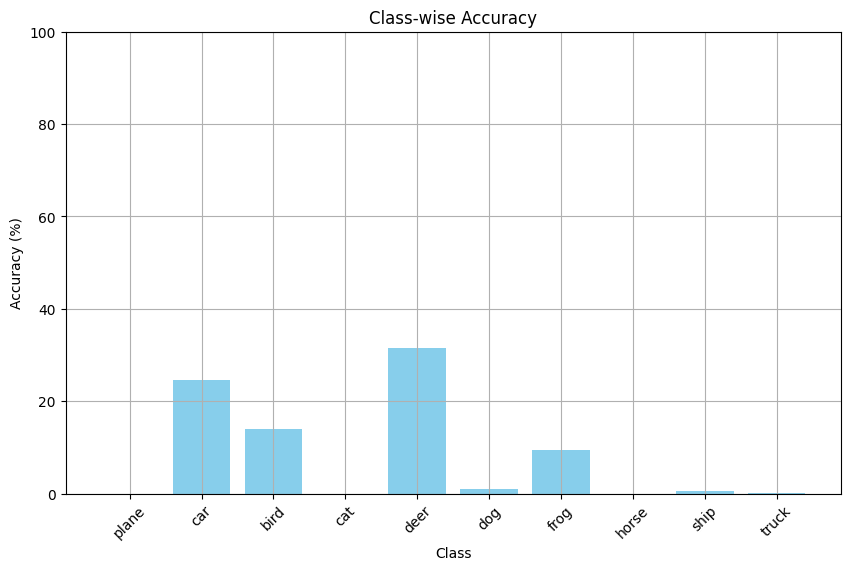

In [ ]:
model = models.resnet18(weights='IMAGENET1K_V1')
model.fc = nn.Linear(512, 10)
model = model.to(device)
plot_class_accuracy(model, testloader, classes)

# Fine tuning only last layer

Epoch 1/15
Train Loss: 1.2587, Test Loss: 0.8924, Accuracy: 74.61%, Time: 105.62s
Epoch 2/15
Train Loss: 0.7735, Test Loss: 0.9447, Accuracy: 73.77%, Time: 103.14s
Epoch 3/15
Train Loss: 0.7301, Test Loss: 0.9869, Accuracy: 74.25%, Time: 104.15s
Epoch 4/15
Train Loss: 0.6842, Test Loss: 0.6010, Accuracy: 80.83%, Time: 103.25s
Epoch 5/15
Train Loss: 0.6585, Test Loss: 0.7103, Accuracy: 77.40%, Time: 102.91s
Epoch 6/15
Train Loss: 0.6236, Test Loss: 0.6163, Accuracy: 80.09%, Time: 103.83s
Epoch 7/15
Train Loss: 0.5987, Test Loss: 0.6064, Accuracy: 80.14%, Time: 102.82s
Epoch 8/15
Train Loss: 0.5749, Test Loss: 0.5989, Accuracy: 80.23%, Time: 103.46s
Epoch 9/15
Train Loss: 0.5536, Test Loss: 0.5945, Accuracy: 80.17%, Time: 103.90s
Epoch 10/15
Train Loss: 0.5361, Test Loss: 0.5564, Accuracy: 81.63%, Time: 103.35s
Epoch 11/15
Train Loss: 0.5282, Test Loss: 0.5739, Accuracy: 80.82%, Time: 103.53s
Epoch 12/15
Train Loss: 0.5183, Test Loss: 0.5538, Accuracy: 81.52%, Time: 103.75s
Epoch 13/15
T

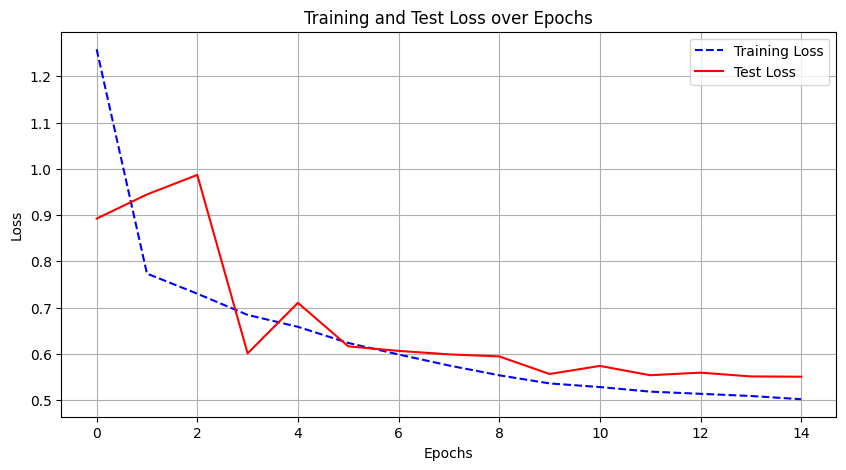

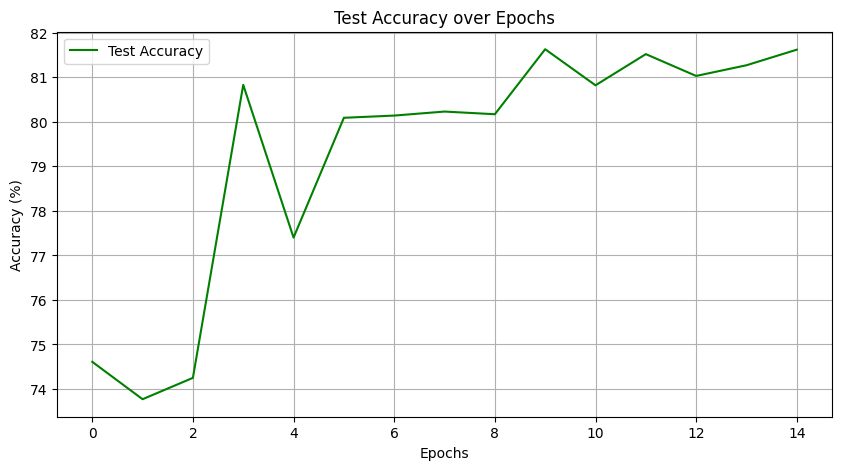

Plots saved as 'plot_assignment2/ResNet-18 Fine Tune FC_loss.png' and 'plot_assignment2/ResNet-18 Fine Tune FC_accuracy.png'.

Training Complete!
Total Training Time: 1553.25 seconds
Minimum Training Loss: 0.5019
Minimum Test Loss: 0.5506
Highest Test Accuracy: 81.63%
Accuracy for class: plane is 84.1 %
Accuracy for class: car   is 91.1 %
Accuracy for class: bird  is 76.5 %
Accuracy for class: cat   is 66.9 %
Accuracy for class: deer  is 71.9 %
Accuracy for class: dog   is 81.6 %
Accuracy for class: frog  is 86.5 %
Accuracy for class: horse is 83.0 %
Accuracy for class: ship  is 89.8 %
Accuracy for class: truck is 84.8 %


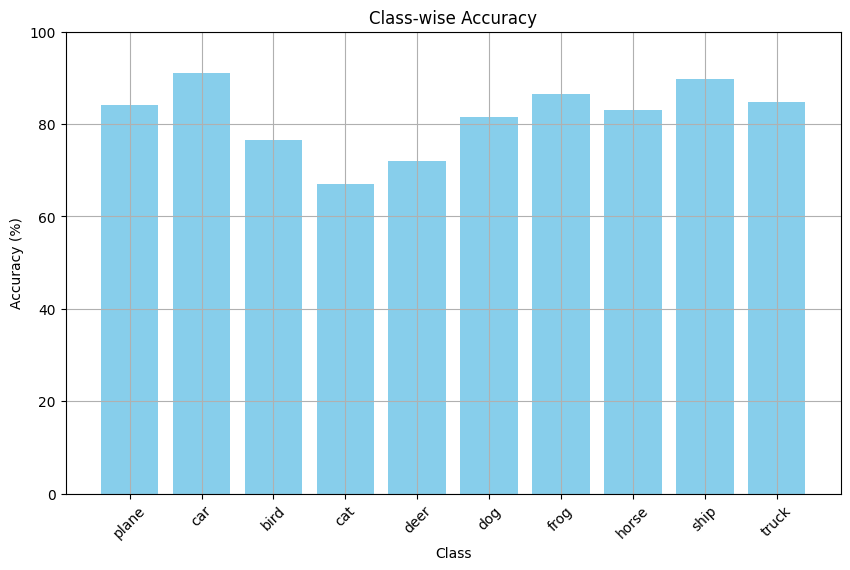

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Load the pretrained ResNet-18 model
net = models.resnet18(weights='IMAGENET1K_V1')  # Use the updated way to load pretrained weights
net.fc = nn.Linear(net.fc.in_features, 10)  # 10 classes for your specific task
net.to(device)

# Freeze all parameters except the last layer
for param in net.parameters():
    param.requires_grad = False

# Enable gradient computation only for the new fc layer
for param in net.fc.parameters():
    param.requires_grad = True

# Set up the optimizer
optimizer = torch.optim.SGD(net.fc.parameters(), lr=0.1, weight_decay=1e-4)  # Only optimize the new fc layer
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Title for plotting purposes
title = 'ResNet-18 Fine Tune FC'

# Function call to plot training results
plot_training(net, trainloader=trainloader, testloader=valloader, epochs=epochs, optimizer=optimizer, criterion=criterion, scheduler=scheduler, title=title)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)


# VARIATION - Fine tune FC with sequential with droput

Epoch 1/15
Train Loss: 1.4310, Test Loss: 0.8571, Accuracy: 73.85%, Time: 103.83s
Epoch 2/15
Train Loss: 0.8884, Test Loss: 0.7058, Accuracy: 76.50%, Time: 103.27s
Epoch 3/15
Train Loss: 0.7788, Test Loss: 0.6607, Accuracy: 77.34%, Time: 103.19s
Epoch 4/15
Train Loss: 0.7334, Test Loss: 0.6391, Accuracy: 78.03%, Time: 102.08s
Epoch 5/15
Train Loss: 0.7059, Test Loss: 0.6234, Accuracy: 78.54%, Time: 103.42s
Epoch 6/15
Train Loss: 0.6910, Test Loss: 0.6105, Accuracy: 78.80%, Time: 103.45s
Epoch 7/15
Train Loss: 0.6767, Test Loss: 0.5993, Accuracy: 79.28%, Time: 103.18s
Epoch 8/15
Train Loss: 0.6706, Test Loss: 0.6008, Accuracy: 79.21%, Time: 103.81s
Epoch 9/15
Train Loss: 0.6696, Test Loss: 0.6004, Accuracy: 79.20%, Time: 104.06s
Epoch 10/15
Train Loss: 0.6692, Test Loss: 0.6042, Accuracy: 79.07%, Time: 102.57s
Epoch 11/15
Train Loss: 0.6614, Test Loss: 0.6026, Accuracy: 79.19%, Time: 102.11s
Epoch 12/15
Train Loss: 0.6616, Test Loss: 0.6017, Accuracy: 79.17%, Time: 103.51s
Epoch 13/15
T

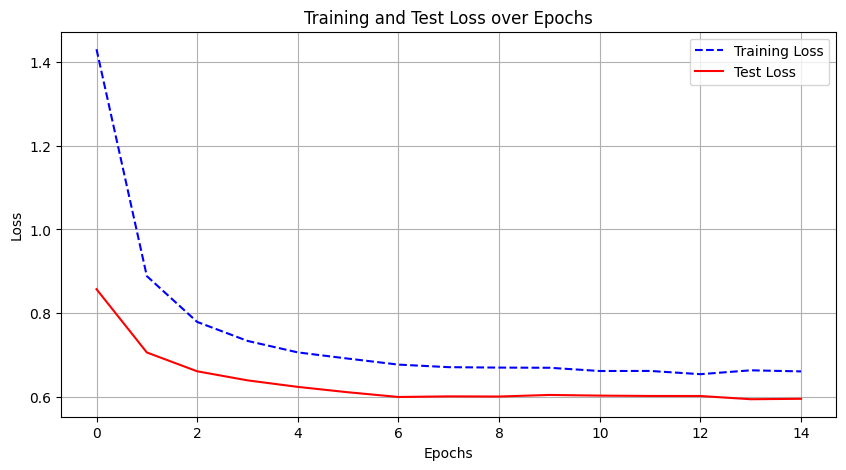

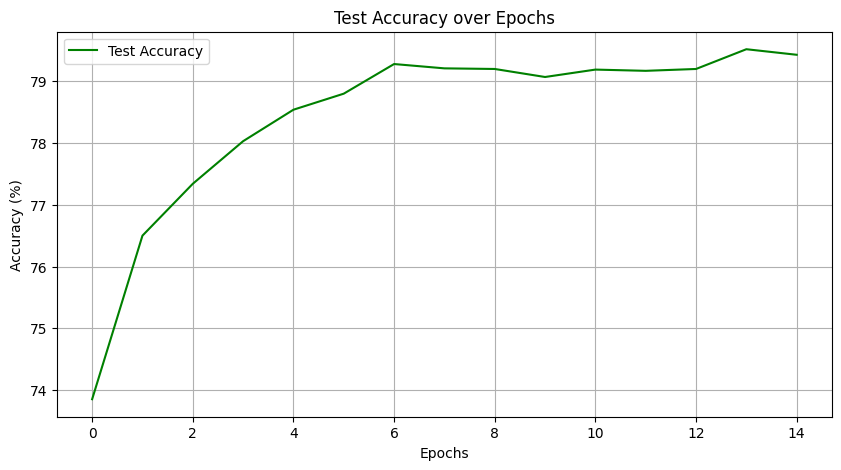

Plots saved as 'plot_assignment2/ResNet-18 Fine Tune FC_loss.png' and 'plot_assignment2/ResNet-18 Fine Tune FC_accuracy.png'.

Training Complete!
Total Training Time: 1548.69 seconds
Minimum Training Loss: 0.6538
Minimum Test Loss: 0.5939
Highest Test Accuracy: 79.52%
Accuracy for class: plane is 79.3 %
Accuracy for class: car   is 91.2 %
Accuracy for class: bird  is 71.1 %
Accuracy for class: cat   is 62.0 %
Accuracy for class: deer  is 70.6 %
Accuracy for class: dog   is 80.4 %
Accuracy for class: frog  is 87.3 %
Accuracy for class: horse is 80.7 %
Accuracy for class: ship  is 88.0 %
Accuracy for class: truck is 83.7 %


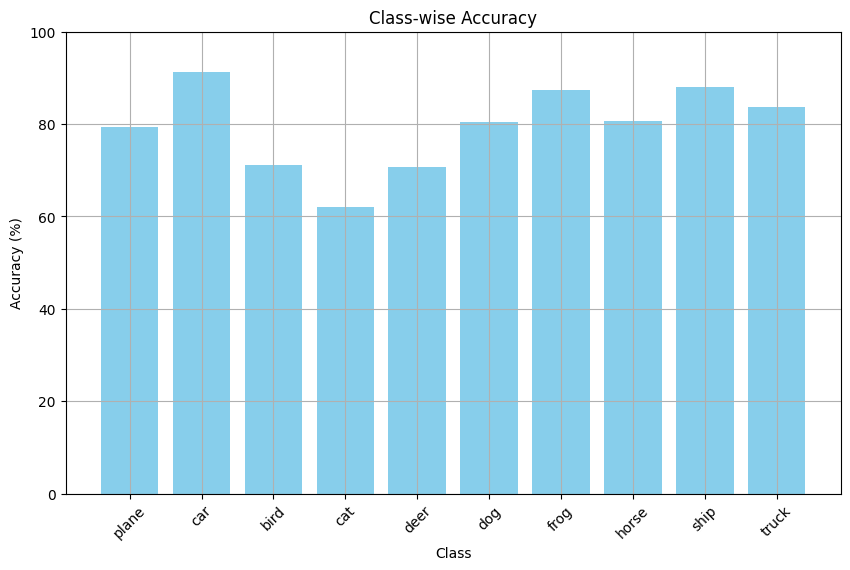

In [ ]:

net = models.resnet18(weights='IMAGENET1K_V1')  # Use the updated way to load pretrained weights
net.fc = nn.Sequential(
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 10)
)
net.to(device)

# Freeze all parameters except the last layer
for param in net.parameters():
    param.requires_grad = False

# Enable gradient computation only for the new fc layer
for param in net.fc.parameters():
    param.requires_grad = True

# Set up the optimizer
optimizer = torch.optim.SGD(net.fc.parameters(), lr=0.01, weight_decay=1e-4)  # Only optimize the new fc layer
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Title for plotting purposes
title = 'ResNet-18 Fine Tune FC'

# Function call to plot training results
plot_training(net, trainloader=trainloader, testloader=valloader, epochs=epochs, optimizer=optimizer, criterion=criterion, scheduler=scheduler, title=title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

## Add additional layer to the pre-trained model


In [ ]:
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    nn.Dropout(0.5),
    net.fc
)
net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

Epoch 1/15
Train Loss: 0.5031, Test Loss: 0.2103, Accuracy: 93.10%, Time: 96.39s
Epoch 2/15
Train Loss: 0.2086, Test Loss: 0.1867, Accuracy: 93.85%, Time: 99.12s
Epoch 3/15
Train Loss: 0.1382, Test Loss: 0.1710, Accuracy: 94.21%, Time: 99.70s
Epoch 4/15
Train Loss: 0.1003, Test Loss: 0.1541, Accuracy: 95.10%, Time: 98.99s
Epoch 5/15
Train Loss: 0.0772, Test Loss: 0.1769, Accuracy: 94.43%, Time: 102.11s
Epoch 6/15
Train Loss: 0.0583, Test Loss: 0.1496, Accuracy: 95.38%, Time: 98.78s
Epoch 7/15
Train Loss: 0.0418, Test Loss: 0.1638, Accuracy: 95.18%, Time: 95.79s
Epoch 8/15
Train Loss: 0.0285, Test Loss: 0.1509, Accuracy: 95.57%, Time: 96.86s
Epoch 9/15
Train Loss: 0.0209, Test Loss: 0.1342, Accuracy: 96.23%, Time: 97.21s
Epoch 10/15
Train Loss: 0.0159, Test Loss: 0.1512, Accuracy: 95.85%, Time: 97.50s
Epoch 11/15


KeyboardInterrupt: 

# !!!!!!!!!!!!!!!!

## Fine-tuning some part of the CNN (not only the classifier)

In [ ]:
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    nn.Dropout(0.5),
    net.fc
)
net.to(device)
# Unfreeze layer4 parameters
for param in net.layer4.parameters():
    param.requires_grad = True

# Unfreeze fc layer parameters
net.fc.requires_grad = True

# Setting different learning rates
layer4_params = {'params': net.layer4.parameters(), 'lr': 0.001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.1}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.Adam([layer4_params, fc_params], weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L4 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

Epoch 1/15


KeyboardInterrupt: 

# change lr to fc+l4 fine tune resized

Epoch 1/15
Train Loss: 5.5347, Test Loss: 2.5048, Accuracy: 47.58%, Time: 94.98s
Epoch 2/15
Train Loss: 4.8578, Test Loss: 2.1996, Accuracy: 63.05%, Time: 94.48s
Epoch 3/15
Train Loss: 3.4477, Test Loss: 1.4261, Accuracy: 71.54%, Time: 95.63s
Epoch 4/15
Train Loss: 1.1773, Test Loss: 0.6916, Accuracy: 77.71%, Time: 94.86s
Epoch 5/15
Train Loss: 0.8231, Test Loss: 0.7352, Accuracy: 82.07%, Time: 94.01s
Epoch 6/15
Train Loss: 0.6838, Test Loss: 0.5171, Accuracy: 84.63%, Time: 94.48s
Epoch 7/15
Train Loss: 0.5350, Test Loss: 0.4469, Accuracy: 86.70%, Time: 94.48s
Epoch 8/15
Train Loss: 0.4450, Test Loss: 0.3931, Accuracy: 87.94%, Time: 94.07s
Epoch 9/15
Train Loss: 0.4313, Test Loss: 0.3977, Accuracy: 88.08%, Time: 94.69s
Epoch 10/15
Train Loss: 0.3474, Test Loss: 0.3473, Accuracy: 89.54%, Time: 94.16s
Epoch 11/15
Train Loss: 0.2839, Test Loss: 0.3847, Accuracy: 89.37%, Time: 94.99s
Epoch 12/15
Train Loss: 0.2559, Test Loss: 0.3307, Accuracy: 90.29%, Time: 94.39s
Epoch 13/15
Train Loss: 0

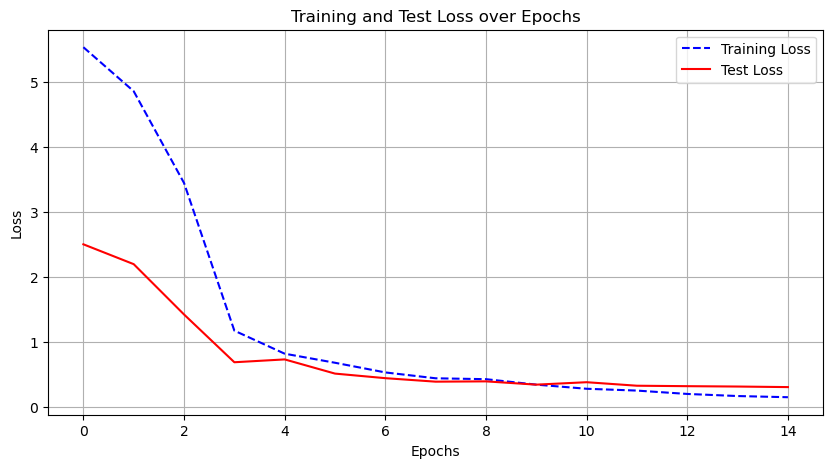

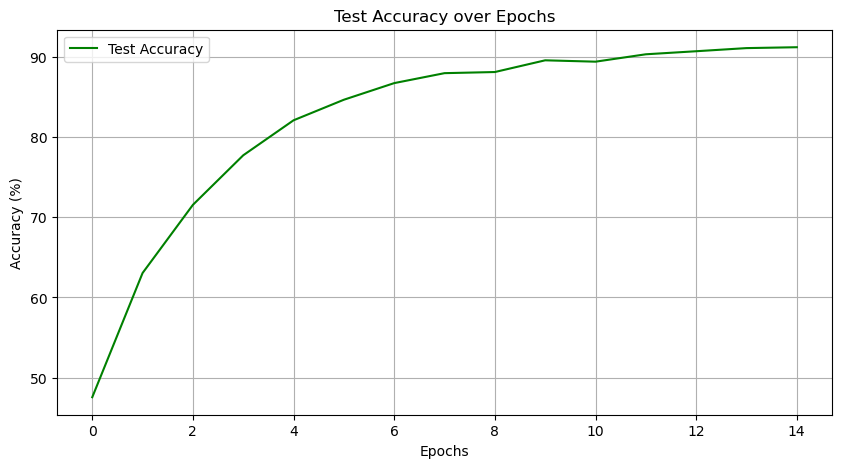

Plots saved as 'plot_assignment2\Resnet18 Fine Tune FC&L4 with different optimizers_loss.png' and 'plot_assignment2\Resnet18 Fine Tune FC&L4 with different optimizers_accuracy.png'.

Training Complete!
Total Training Time: 1418.96 seconds
Minimum Training Loss: 0.1539
Minimum Test Loss: 0.3096
Highest Test Accuracy: 91.17%
Accuracy for class: plane is 94.4 %
Accuracy for class: car   is 93.2 %
Accuracy for class: bird  is 88.6 %
Accuracy for class: cat   is 81.3 %
Accuracy for class: deer  is 92.1 %
Accuracy for class: dog   is 84.1 %
Accuracy for class: frog  is 93.7 %
Accuracy for class: horse is 93.3 %
Accuracy for class: ship  is 95.4 %
Accuracy for class: truck is 95.6 %


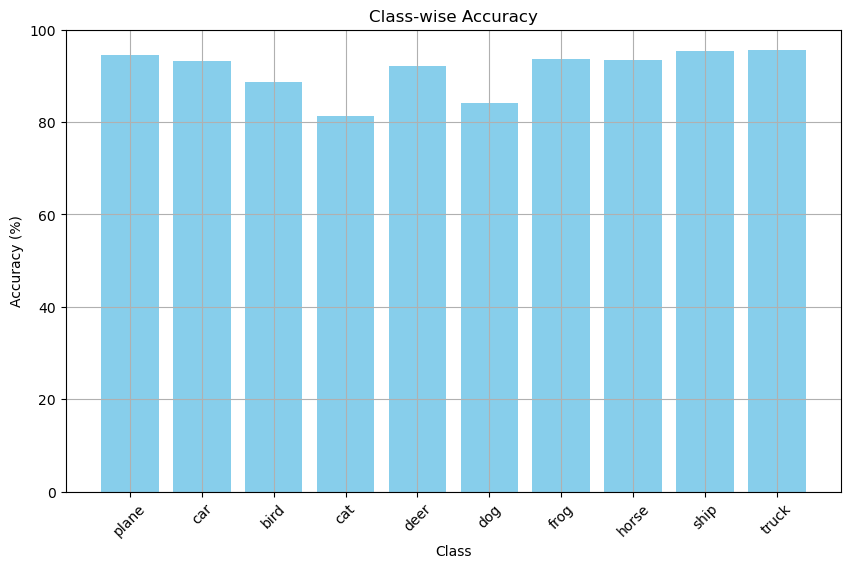

In [ ]:
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    nn.Dropout(0.5),
    net.fc
)
net.to(device)
# Unfreeze layer4 parameters
for param in net.layer4.parameters():
    param.requires_grad = True

# Unfreeze fc layer parameters
net.fc.requires_grad = True

# Setting different learning rates
layer4_params = {'params': net.layer4.parameters(), 'lr': 0.0001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.01}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.Adam([layer4_params, fc_params], weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L4 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

Epoch 1/15
Train Loss: 0.7266, Test Loss: 0.4740, Accuracy: 83.65%, Time: 149.24s
Epoch 2/15
Train Loss: 0.4515, Test Loss: 0.4060, Accuracy: 85.80%, Time: 148.89s
Epoch 3/15
Train Loss: 0.3864, Test Loss: 0.3574, Accuracy: 87.82%, Time: 150.12s
Epoch 4/15
Train Loss: 0.3453, Test Loss: 0.3788, Accuracy: 86.85%, Time: 148.60s
Epoch 5/15
Train Loss: 0.3181, Test Loss: 0.3124, Accuracy: 89.56%, Time: 148.70s
Epoch 6/15
Train Loss: 0.2906, Test Loss: 0.3014, Accuracy: 89.65%, Time: 149.56s
Epoch 7/15
Train Loss: 0.2792, Test Loss: 0.2934, Accuracy: 89.86%, Time: 147.97s
Epoch 8/15
Train Loss: 0.2624, Test Loss: 0.2979, Accuracy: 89.89%, Time: 148.09s
Epoch 9/15
Train Loss: 0.2465, Test Loss: 0.2784, Accuracy: 90.61%, Time: 149.40s
Epoch 10/15
Train Loss: 0.2383, Test Loss: 0.2772, Accuracy: 90.71%, Time: 147.65s
Epoch 11/15
Train Loss: 0.2296, Test Loss: 0.2663, Accuracy: 90.95%, Time: 148.23s
Epoch 12/15
Train Loss: 0.2196, Test Loss: 0.2622, Accuracy: 91.16%, Time: 148.67s
Epoch 13/15
T

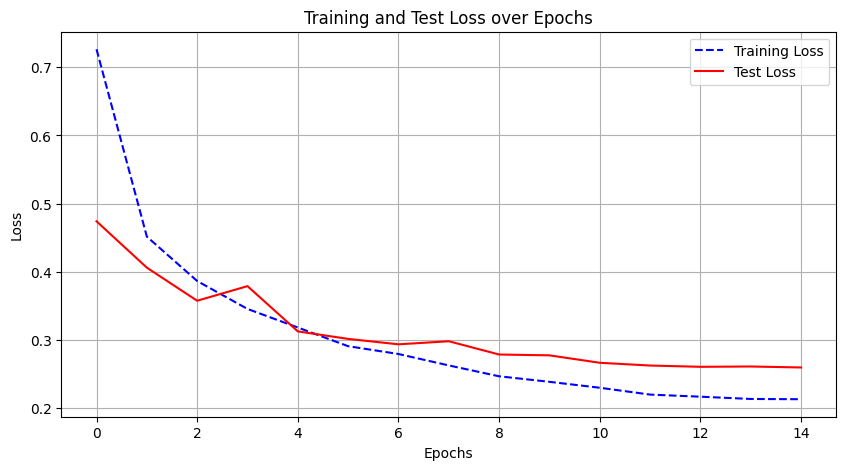

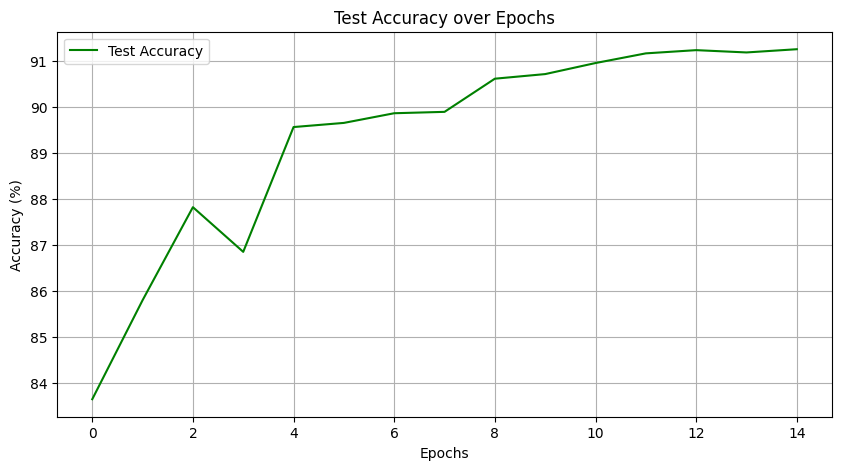

Plots saved as 'plot_assignment2/Resnet18 Fine Tune FC&L2 with different optimizers_loss.png' and 'plot_assignment2/Resnet18 Fine Tune FC&L2 with different optimizers_accuracy.png'.

Training Complete!
Total Training Time: 2229.09 seconds
Minimum Training Loss: 0.2128
Minimum Test Loss: 0.2594
Highest Test Accuracy: 91.25%
Accuracy for class: plane is 92.8 %
Accuracy for class: car   is 95.4 %
Accuracy for class: bird  is 89.2 %
Accuracy for class: cat   is 79.4 %
Accuracy for class: deer  is 89.7 %
Accuracy for class: dog   is 88.7 %
Accuracy for class: frog  is 94.8 %
Accuracy for class: horse is 93.9 %
Accuracy for class: ship  is 95.2 %
Accuracy for class: truck is 93.4 %


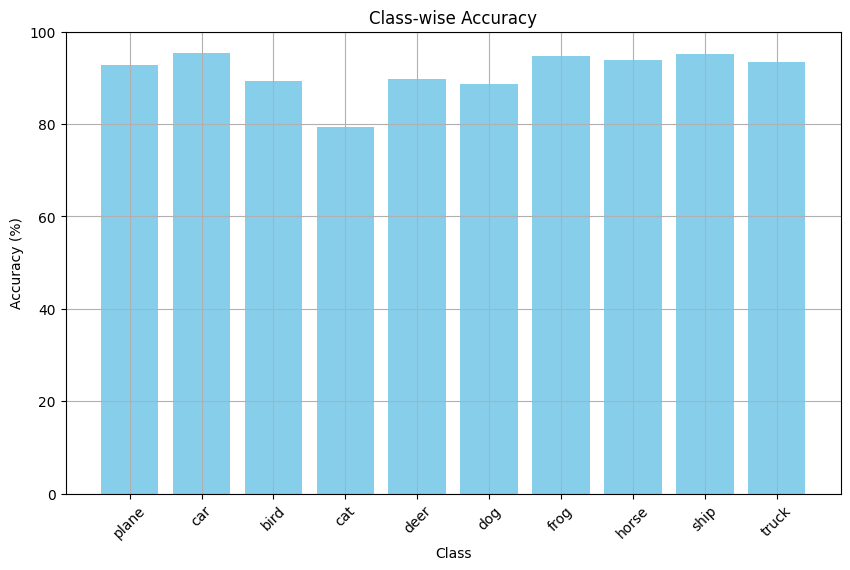

In [ ]:
# Unfreeze layer4 parameters
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    net.fc
)
for param in net.layer2.parameters():
    param.requires_grad = True

# Unfreeze fc layer parameters
net.fc.requires_grad = True

# Setting different learning rates
layer2_params = {'params': net.layer2.parameters(), 'lr': 0.0001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.01}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.SGD([layer2_params, fc_params], momentum=0.9, weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L2 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

Epoch 1/15
Train Loss: 0.6524, Test Loss: 0.4371, Accuracy: 85.14%, Time: 123.18s
Epoch 2/15
Train Loss: 0.4312, Test Loss: 0.4025, Accuracy: 87.20%, Time: 124.27s
Epoch 3/15
Train Loss: 0.3840, Test Loss: 0.3826, Accuracy: 87.81%, Time: 122.90s
Epoch 4/15
Train Loss: 0.3677, Test Loss: 0.3716, Accuracy: 88.18%, Time: 125.03s
Epoch 5/15
Train Loss: 0.3425, Test Loss: 0.3732, Accuracy: 87.98%, Time: 123.78s
Epoch 6/15
Train Loss: 0.3154, Test Loss: 0.3097, Accuracy: 90.01%, Time: 123.30s
Epoch 7/15
Train Loss: 0.2996, Test Loss: 0.3280, Accuracy: 89.76%, Time: 124.16s
Epoch 8/15
Train Loss: 0.2797, Test Loss: 0.3099, Accuracy: 89.87%, Time: 122.40s
Epoch 9/15
Train Loss: 0.2643, Test Loss: 0.2743, Accuracy: 90.91%, Time: 124.61s
Epoch 10/15
Train Loss: 0.2474, Test Loss: 0.2951, Accuracy: 90.28%, Time: 123.13s
Epoch 11/15
Train Loss: 0.2322, Test Loss: 0.2711, Accuracy: 91.10%, Time: 123.93s
Epoch 12/15
Train Loss: 0.2189, Test Loss: 0.2587, Accuracy: 91.37%, Time: 123.41s
Epoch 13/15
T

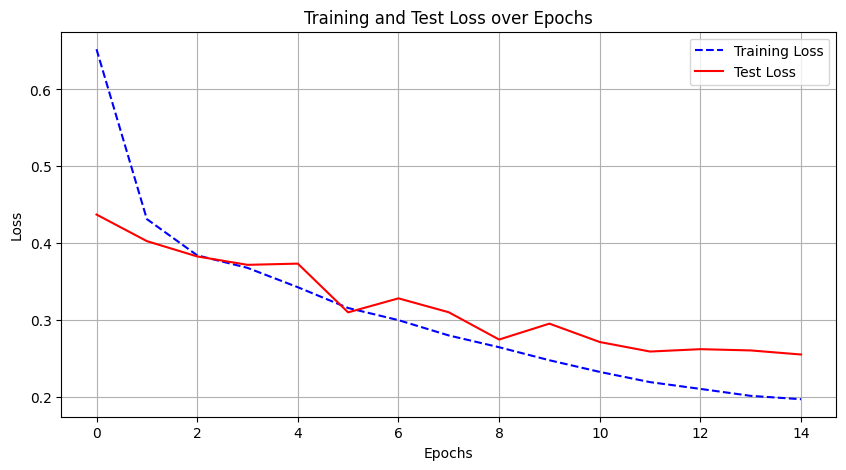

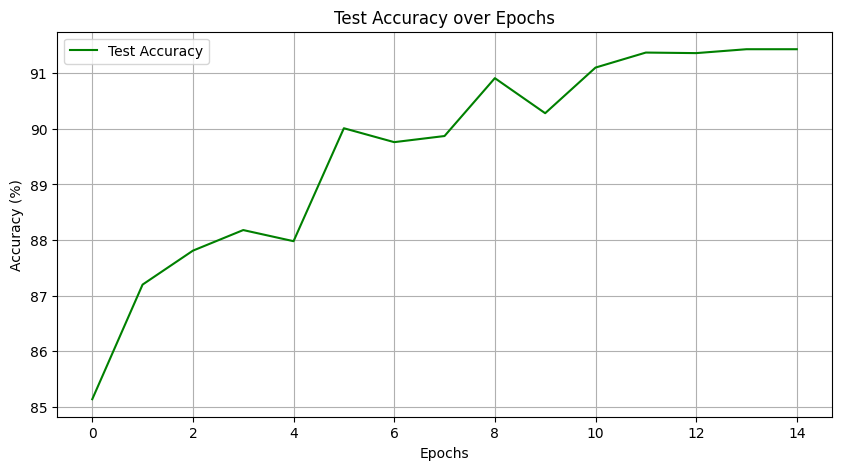

Plots saved as 'plot_assignment2/Resnet18 Fine Tune FC&L2 with different optimizers_loss.png' and 'plot_assignment2/Resnet18 Fine Tune FC&L2 with different optimizers_accuracy.png'.

Training Complete!
Total Training Time: 1855.24 seconds
Minimum Training Loss: 0.1966
Minimum Test Loss: 0.2548
Highest Test Accuracy: 91.43%
Accuracy for class: plane is 93.0 %
Accuracy for class: car   is 95.8 %
Accuracy for class: bird  is 90.3 %
Accuracy for class: cat   is 80.9 %
Accuracy for class: deer  is 90.5 %
Accuracy for class: dog   is 88.4 %
Accuracy for class: frog  is 94.5 %
Accuracy for class: horse is 92.1 %
Accuracy for class: ship  is 94.9 %
Accuracy for class: truck is 93.9 %


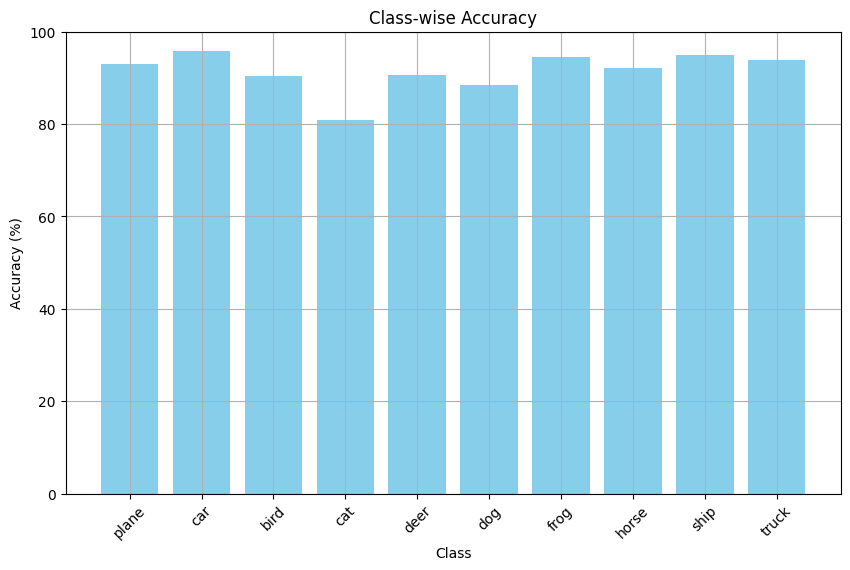

In [ ]:
# Unfreeze layer4 parameters
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    net.fc
)

for param in net.parameters():
    param.requires_grad = False
for param in net.fc.parameters():
    param.requires_grad = True
for param in net.layer1.parameters():
    param.requires_grad = True
# Unfreeze fc layer parameters

# Setting different learning rates
layer1_params = {'params': net.layer1.parameters(), 'lr': 0.0001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.01}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.Adam([layer1_params, fc_params], weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L2 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

# !!!!!!!!!!!!!!

In [ ]:
# Unfreeze layer4 parameters
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    net.fc
)

for param in net.parameters():
    param.requires_grad = False
for param in net.fc.parameters():
    param.requires_grad = True
for param in net.layer1.parameters():
    param.requires_grad = True
# Unfreeze fc layer parameters

# Setting different learning rates
layer1_params = {'params': net.layer1.parameters(), 'lr': 0.0001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.01}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.SGD([layer1_params, fc_params], weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L2 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

## Exercise 1

How many layers it is better to fine-tune?

It is better to update all the weights of the model?

## Exercise 2

Try to change the hyper-parameters of the fine-tuning (e.g. lr of CNN layers and lr of the fc layers) and/or network architecture

## Exercise 3

Try to implement the model selection strategy (also known as early stopping) based on the validation accuracy on cifar10.

Consider using the two following command to respectively save and load the state of all the parameters of the model in a moment.

In [ ]:
# save all the parameters of the model
model_state_dict = net.state_dict()

# load saved weights on the model
net.load_state_dict(model_state_dict)


<All keys matched successfully>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30
Train Loss: 0.6095, Test Loss: 0.3080, Accuracy: 89.62%, Time: 150.99s
Epoch 2/30
Train Loss: 0.2318, Test Loss: 0.2639, Accuracy: 90.77%, Time: 152.60s
Epoch 3/30
Train Loss: 0.1585, Test Loss: 0.2150, Accuracy: 92.47%, Time: 152.78s
Epoch 4/30
Train Loss: 0.1164, Test Loss: 0.2761, Accuracy: 91.51%, Time: 151.55s
Epoch 5/30
Train Loss: 0.0842, Test Loss: 0.2439, Accuracy: 92.86%, Time: 151.93s
Epoch 6/30
Train Loss: 0.0621, Test Loss: 0.2066, Accuracy: 93.82%, Time: 152.45s
Epoch 7/30
Train Loss: 0.0456, Test Loss: 0.2001, Accuracy: 94.06%, Time: 151.22s
Epoch 8/30
Train Loss: 0.0373, Test Loss: 0.2120, Accuracy: 93.96%, Time: 152.30s
Epoch 9/30
Train Loss: 0.0283, Test Loss: 0.2039, Accuracy: 94.34%, Time: 152.60s
Epoch 10/30
Train Loss: 0.0197, Test Loss: 0.1826, Accuracy: 94.94%, Time: 151.66s
Epoch 11/30
Train Loss: 0.0141, Test Loss: 0.1854, Accuracy: 94.98%, Time: 151.38s
Epoch 12/30
Train Loss: 0.0103, Test Loss: 0.1795, Accuracy: 95.00%, Time: 152.56s
Epoch 13/30
T

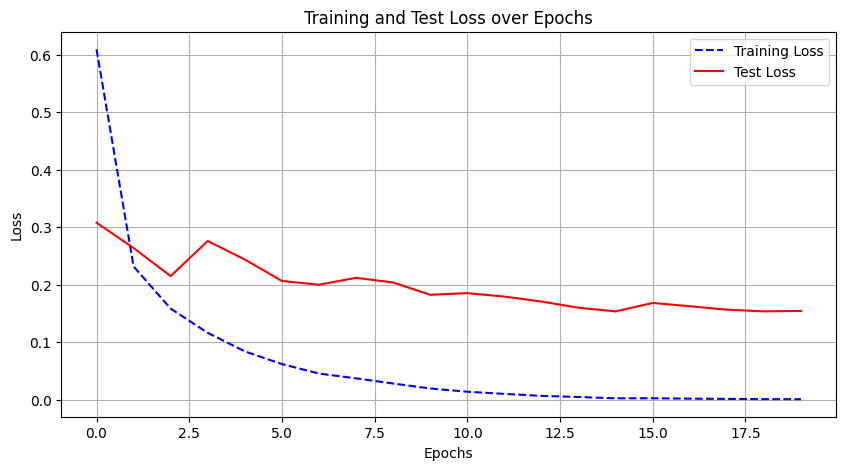

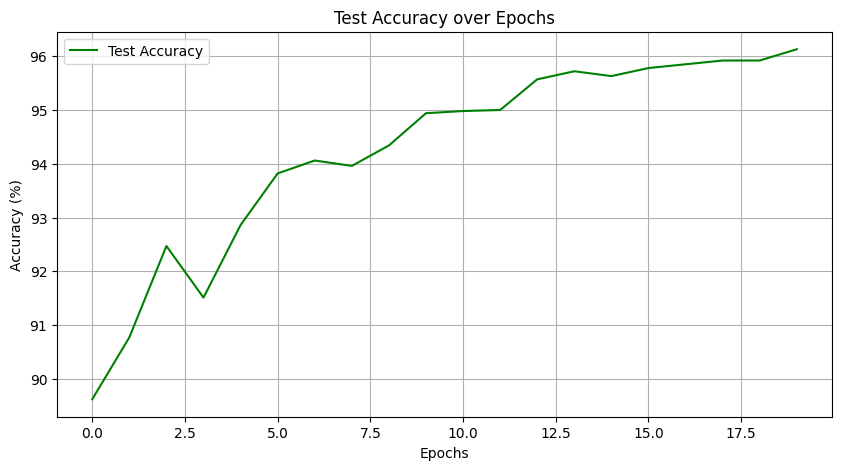

Plots saved as 'plot_assignment2/Resnet18 Pretrained_loss.png' and 'plot_assignment2/Resnet18 Pretrained_accuracy.png'.

Training Complete!
Total Training Time: 2885.38 seconds
Minimum Training Loss: 0.0010
Minimum Test Loss: 0.1537
Highest Test Accuracy: 96.13%
Accuracy for class: plane is 96.7 %
Accuracy for class: car   is 98.2 %
Accuracy for class: bird  is 94.7 %
Accuracy for class: cat   is 90.7 %
Accuracy for class: deer  is 97.4 %
Accuracy for class: dog   is 93.1 %
Accuracy for class: frog  is 97.9 %
Accuracy for class: horse is 97.1 %
Accuracy for class: ship  is 98.1 %
Accuracy for class: truck is 96.3 %


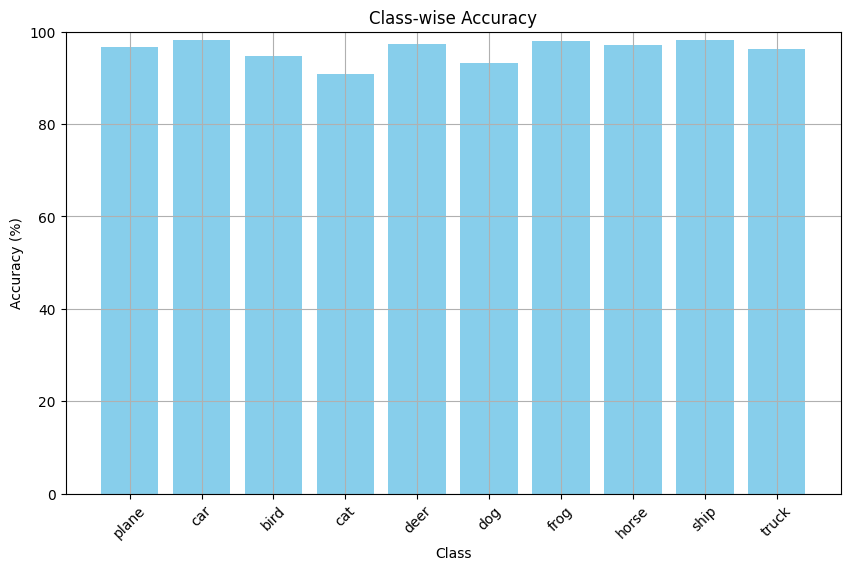

In [ ]:
epochs=30
net = models.resnet18(pretrained=True)

for param in net.parameters():
    param.requires_grad = True
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
criterion = nn.CrossEntropyLoss()
net = net.to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
plot_early_stopping(net, trainloader=trainloader, testloader=valloader, epochs=epochs, optimizer=optimizer, criterion=criterion, scheduler=scheduler, title='Resnet18 Pretrained')
plot_class_accuracy(net, testloader, classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)

Epoch 1/30
Train Loss: 0.8148, Test Loss: 0.4790, Accuracy: 86.81%, Time: 150.46s
Epoch 2/30
Train Loss: 0.5563, Test Loss: 0.4246, Accuracy: 87.74%, Time: 151.36s
Epoch 3/30
Train Loss: 0.4541, Test Loss: 0.4548, Accuracy: 89.49%, Time: 149.75s
Epoch 4/30
Train Loss: 0.3957, Test Loss: 0.3897, Accuracy: 90.05%, Time: 150.73s
Epoch 5/30
Train Loss: 0.3644, Test Loss: 0.3636, Accuracy: 90.52%, Time: 149.90s
Epoch 6/30
Train Loss: 0.3207, Test Loss: 0.5490, Accuracy: 90.21%, Time: 150.79s
Epoch 7/30
Train Loss: 0.3049, Test Loss: 0.4369, Accuracy: 89.32%, Time: 150.06s
Epoch 8/30
Train Loss: 0.2687, Test Loss: 0.3454, Accuracy: 91.64%, Time: 150.70s
Epoch 9/30
Train Loss: 0.2597, Test Loss: 0.4550, Accuracy: 91.15%, Time: 150.01s
Epoch 10/30
Train Loss: 0.2091, Test Loss: 0.3507, Accuracy: 92.47%, Time: 149.75s
Epoch 11/30
Train Loss: 0.1906, Test Loss: 0.3782, Accuracy: 91.64%, Time: 150.96s
Epoch 12/30
Train Loss: 0.1653, Test Loss: 0.4051, Accuracy: 92.23%, Time: 149.85s
Epoch 13/30
E

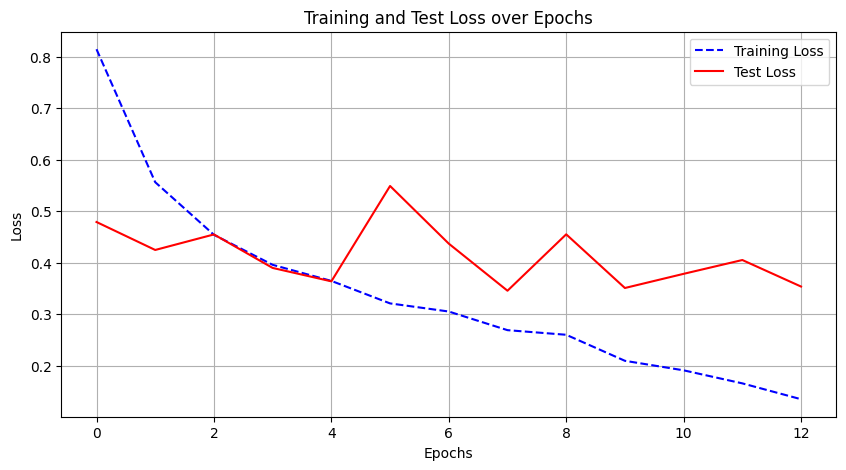

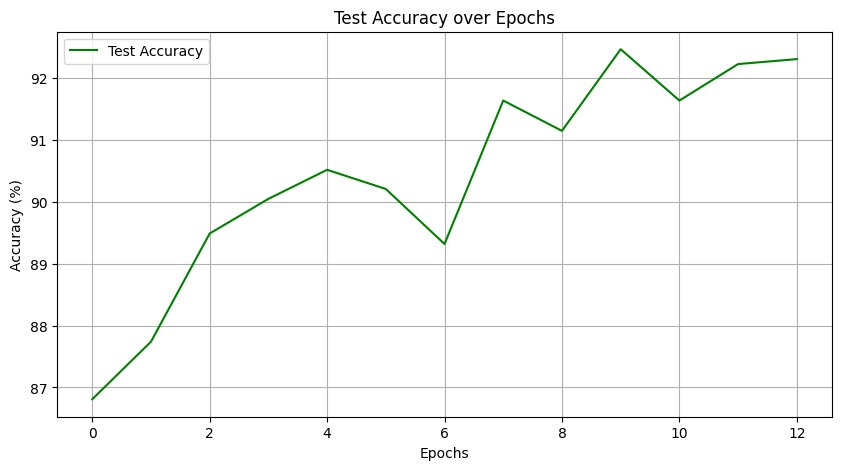

Plots saved as 'plot_assignment2/Resnet18 Fine Tune FC&L4 with different optimizers_loss.png' and 'plot_assignment2/Resnet18 Fine Tune FC&L4 with different optimizers_accuracy.png'.

Training Complete!
Total Training Time: 1804.33 seconds
Minimum Training Loss: 0.1345
Minimum Test Loss: 0.3454
Highest Test Accuracy: 92.47%
Accuracy for class: plane is 95.1 %
Accuracy for class: car   is 96.5 %
Accuracy for class: bird  is 90.8 %
Accuracy for class: cat   is 80.0 %
Accuracy for class: deer  is 90.5 %
Accuracy for class: dog   is 90.5 %
Accuracy for class: frog  is 95.4 %
Accuracy for class: horse is 93.7 %
Accuracy for class: ship  is 96.0 %
Accuracy for class: truck is 94.6 %


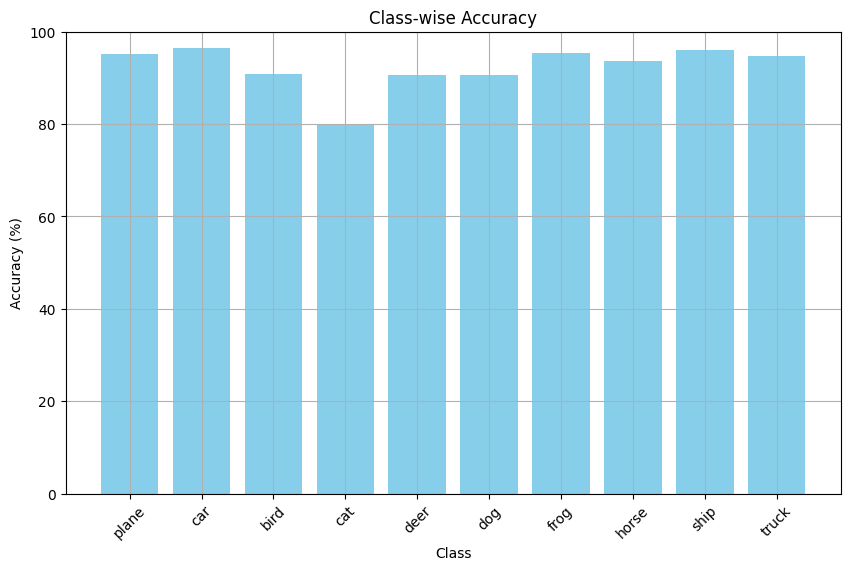

In [ ]:
epochs=30
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    nn.Dropout(0.5),
    net.fc
)
net.to(device)
# Unfreeze layer4 parameters
for param in net.layer4.parameters():
    param.requires_grad = True

# Unfreeze fc layer parameters
net.fc.requires_grad = True

# Setting different learning rates
layer4_params = {'params': net.layer4.parameters(), 'lr': 0.0001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.01}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.Adam([layer4_params, fc_params], weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L4 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_early_stopping(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes,device)